Epoch 1/100


c:\Users\jufeg\Documents\VSC_codes\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 40111.7617 - mse: 40111.7617 - val_loss: 3329.2332 - val_mse: 3329.2332
Epoch 2/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1911.2787 - mse: 1911.2787 - val_loss: 702.9153 - val_mse: 702.9153
Epoch 3/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 536.0066 - mse: 536.0066 - val_loss: 344.8664 - val_mse: 344.8664
Epoch 4/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 282.7590 - mse: 282.7590 - val_loss: 163.1663 - val_mse: 163.1663
Epoch 5/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 131.3043 - mse: 131.3043 - val_loss: 78.4419 - val_mse: 78.4419
Epoch 6/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 66.9488 - mse: 66.9488 - val_loss: 44.8039 - val_mse: 44.8039
Epoch 7/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.8362 - mse: 41.8362 - val_loss: 32.4883 - val_mse: 32.4883
Epoch 8/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29.4965 - mse: 29.4965 - val_loss: 24.5299 - val_mse: 24.5299
Ep

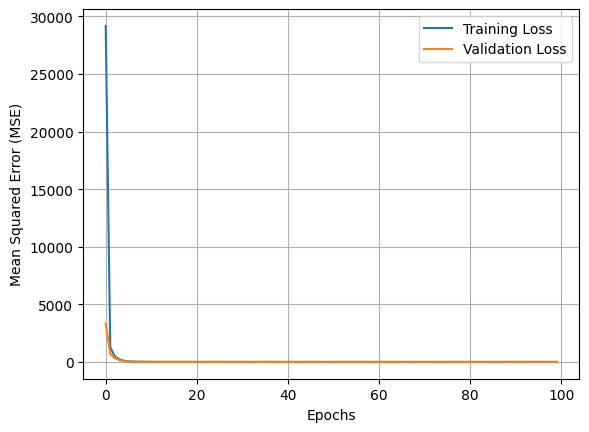

In [8]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar los datos
data = pd.read_csv('Dummy_Data_HSS.csv')

# Verificar y manejar valores NaN o infinitos en los datos
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Convertir datos categóricos en variables numéricas con one-hot encoding (si es necesario)
data = pd.get_dummies(data, drop_first=True)

# Separar las características (X) y el objetivo (y)
X = data.drop('Sales', axis=1)  # 'Sales' es la variable objetivo
y = data['Sales']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir el modelo de red neuronal para regresión
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Capa de salida para regresión

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=10, verbose=1)

# Evaluar el modelo
mse = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Error Cuadrático Medio (MSE) en el conjunto de prueba: {mse}")

# Graficar la pérdida de entrenamiento y validación
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid()
plt.show()


In [10]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar el conjunto de datos Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Convertir los datos en un DataFrame de Pandas
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Separar las características y el objetivo
X = df.drop('target', axis=1)
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir el modelo de red neuronal para clasificación
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Activación sigmoide para salida binaria

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=10, verbose=1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

# Generar predicciones y evaluar métricas adicionales
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))



Epoch 1/100


c:\Users\jufeg\Documents\VSC_codes\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6904 - loss: 0.5886 - val_accuracy: 0.9341 - val_loss: 0.2604
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9557 - loss: 0.1870 - val_accuracy: 0.9451 - val_loss: 0.1547
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9736 - loss: 0.0985 - val_accuracy: 0.9560 - val_loss: 0.1204
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9761 - loss: 0.0815 - val_accuracy: 0.9560 - val_loss: 0.1075
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9898 - loss: 0.0527 - val_accuracy: 0.9670 - val_loss: 0.0995
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9853 - loss: 0.0531 - val_accuracy: 0.9560 - val_loss: 0.0938
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9935 - loss: 0.0265 - val_accuracy: 0.9560 - val_loss: 0.0882
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9747 - loss: 0.0633 - val_accuracy: 0.9560 - val_loss: 0.0

In [14]:
# Importar librerías
import pandas as pd
from sklearn.datasets import load_breast_cancer
from IPython.display import display

# Cargar el conjunto de datos del cáncer de mama
data = load_breast_cancer()

# Convertir a DataFrame de pandas
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Mostrar los primeros 5 registros del dataset
print("Primeros 5 registros del dataset de cáncer de mama:")
display(df.head())

# Mostrar información general del DataFrame
print("Información general del dataset:")
display(df.info())

# Mostrar un resumen estadístico de los datos
print("Resumen estadístico del dataset:")
display(df.describe())


Primeros 5 registros del dataset de cáncer de mama:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float6

None

Resumen estadístico del dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


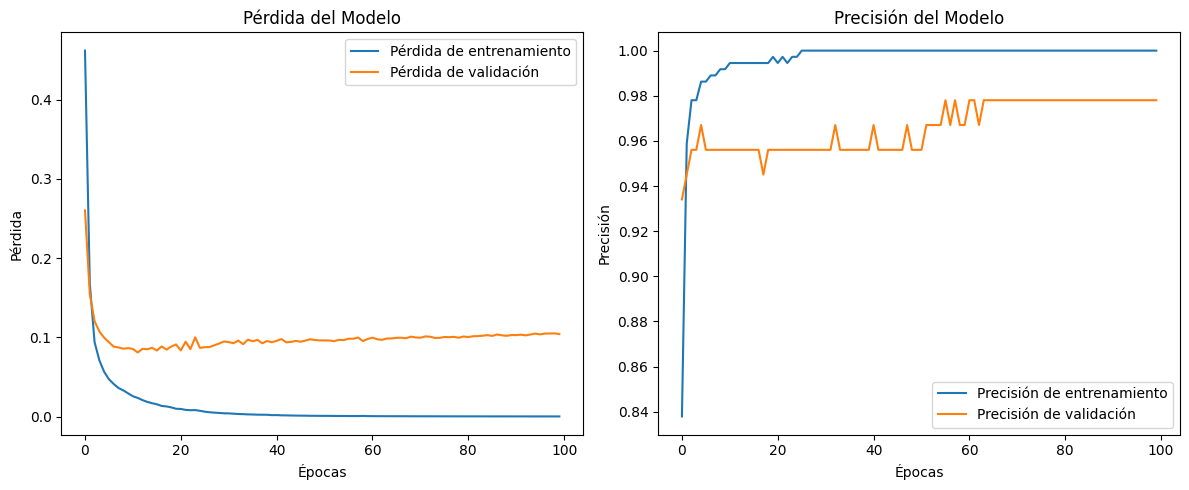

In [11]:
import matplotlib.pyplot as plt

# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

# Gráfica de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfica de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()
